In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.basemap import Basemap
from scipy.io import loadmat
import cmocean 
import warnings
import arrow
from salishsea_tools import viz_tools, places
import netCDF4 as nc
import pickle
from salishsea_tools import visualisations as vis
#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

## undersaturated percents are calculated in:
    KEY_OMA OmA_percent_domain_cells_undersaturated_calculator

# code for extracting OmA averages -winter/summer

In [4]:
# start ='2015-06-01'
# end ='2015-08-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)

# BR_oma_summer = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI5_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_summer[i,:,:,:] = t_Oma

# BR_oma_summer_mean = np.nanmean(BR_oma_summer,axis=0)
# pickle.dump(BR_oma_summer_mean, open("../pkls/PI5_Oma_SUMMERmean_01jun_31aug.pkl", 'wb'))
# print(np.shape(BR_oma_summer_mean))

# start ='2015-12-01'
# end ='2015-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array1 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array1.append(r)
# dayslen = len(arrow_array1)

# BR_oma_winter1 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array1[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI5_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_winter1[i,:,:,:] = t_Oma

# start ='2015-01-01'
# end ='2015-02-28'

# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array2 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array2.append(r)
# dayslen = len(arrow_array2)

# BR_oma_winter2 = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array2[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/PI5_OmA_plus_'+ymd+'.nc')
#     t_Oma = t_pco2['model_output']['OmA'][:,:,:]
#     BR_oma_winter2[i,:,:,:] = t_Oma

# BR_oma_winter = np.concatenate((BR_oma_winter1,BR_oma_winter2),axis=0)
# print(np.shape(BR_oma_winter))
# BR_oma_winter_mean = np.nanmean(BR_oma_winter,axis=0)
# pickle.dump(BR_oma_winter_mean, open("../pkls/PI5_Oma_WINTERmean_01dec_28feb.pkl", 'wb'))




In [5]:
BR3_summer_3mon = pickle.load(open('../pkls/aragonite/BR3_Oma_SUMMERmean_01jun_31aug.pkl', 'rb'))  
BR3_winter_3mon = pickle.load(open('../pkls/aragonite/BR3_Oma_WINTERmean_01dec_28feb.pkl', 'rb'))  
PI5_summer_3mon = pickle.load(open('../pkls/PI5_Oma_SUMMERmean_01jun_31aug.pkl', 'rb'))  
PI5_winter_3mon = pickle.load(open('../pkls/PI5_Oma_WINTERmean_01dec_28feb.pkl', 'rb'))  



In [6]:
days = np.arange(1,366,1)
tcm = cmocean.cm.phase
lw = 2.5

BR_under_0pt5_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles/BR_under_0pt5_vol.pkl', 'rb'))   
BR_under_0pt6_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles/BR_under_0pt6_vol.pkl', 'rb'))   
BR_under_0pt7_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_0pt7_vol.pkl', 'rb'))   
BR_under_0pt8_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_0pt8_vol.pkl', 'rb'))   
BR_under_0pt9_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_0pt9_vol.pkl', 'rb'))   
BR_under_1pt0_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt0_vol.pkl', 'rb'))   
BR_under_1pt1_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt1_vol.pkl', 'rb'))   
BR_under_1pt2_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt2_vol.pkl', 'rb'))   
BR_under_1pt3_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt3_vol.pkl', 'rb'))   
BR_under_1pt4_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt4_vol.pkl', 'rb'))   
BR_under_1pt5_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt5_vol.pkl', 'rb')) 

days = np.arange(1,366,1)
tcm = cmocean.cm.phase
lw = 2.5

BR_under_0pt5_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles/BR_under_0pt5_vol.pkl', 'rb'))   
BR_under_0pt6_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles/BR_under_0pt6_vol.pkl', 'rb'))   
BR_under_0pt7_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_0pt7_vol.pkl', 'rb'))   
BR_under_0pt8_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_0pt8_vol.pkl', 'rb'))   
BR_under_0pt9_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_0pt9_vol.pkl', 'rb'))   
BR_under_1pt0_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt0_vol.pkl', 'rb'))   
BR_under_1pt1_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt1_vol.pkl', 'rb'))   
BR_under_1pt2_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt2_vol.pkl', 'rb'))   
BR_under_1pt3_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt3_vol.pkl', 'rb'))   
BR_under_1pt4_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt4_vol.pkl', 'rb'))   
BR_under_1pt5_vol = pickle.load(open('../KEY_OMA/domain_undersat_pickles//BR_under_1pt5_vol.pkl', 'rb')) 

PI_under_0pt5_vol = pickle.load(open('../pkls/PI5_under_0pt5_vol.pkl', 'rb'))   
PI_under_0pt6_vol = pickle.load(open('../pkls/PI5_under_0pt6_vol.pkl', 'rb'))   
PI_under_0pt7_vol = pickle.load(open('../pkls/PI5_under_0pt7_vol.pkl', 'rb'))   
PI_under_0pt8_vol = pickle.load(open('../pkls/PI5_under_0pt8_vol.pkl', 'rb'))   
PI_under_0pt9_vol = pickle.load(open('../pkls/PI5_under_0pt9_vol.pkl', 'rb'))   
PI_under_1pt0_vol = pickle.load(open('../pkls/PI5_under_1pt0_vol.pkl', 'rb'))   
PI_under_1pt1_vol = pickle.load(open('../pkls/PI5_under_1pt1_vol.pkl', 'rb'))   
PI_under_1pt2_vol = pickle.load(open('../pkls/PI5_under_1pt2_vol.pkl', 'rb'))   
PI_under_1pt3_vol = pickle.load(open('../pkls/PI5_under_1pt3_vol.pkl', 'rb'))   
PI_under_1pt4_vol = pickle.load(open('../pkls/PI5_under_1pt4_vol.pkl', 'rb'))   
PI_under_1pt5_vol = pickle.load(open('../pkls/PI5_under_1pt5_vol.pkl', 'rb'))   

## 'Nicest' plot so far - 3 month averages

#### histogram of summer and winter means

In [7]:
csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb'))
csize[BR3_summer_3mon > 1e10 ] = 0


BR3_summer_nn = BR3_summer_3mon[BR3_summer_3mon<1e10]
BR3_winter_nn = BR3_winter_3mon[BR3_winter_3mon<1e10]
PI5_summer_nn = PI5_summer_3mon[PI5_summer_3mon<1e10]
PI5_winter_nn = PI5_winter_3mon[PI5_winter_3mon<1e10]



csize_nn = csize[BR3_summer_3mon<1e10]
csize_nn[np.isnan(csize_nn)] = 0


nbins = 40
hist_BR3_summer, bins = np.histogram(BR3_summer_nn, bins=nbins, range = [0, 4], weights=csize_nn)
hist_PI5_summer, bins = np.histogram(PI5_summer_nn, bins=nbins, range = [0, 4], weights=csize_nn)
hist_BR3_winter, bins = np.histogram(BR3_winter_nn, bins=nbins, range = [0, 4], weights=csize_nn)
hist_PI5_winter, bins = np.histogram(PI5_winter_nn, bins=nbins, range = [0, 4], weights=csize_nn)


bin_cent = bins + (bins[1]-bins[0])/2
print(bins)
print(bin_cent)
tot_count = np.sum(hist_BR3_summer)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4. ]
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05 1.15 1.25 1.35
 1.45 1.55 1.65 1.75 1.85 1.95 2.05 2.15 2.25 2.35 2.45 2.55 2.65 2.75
 2.85 2.95 3.05 3.15 3.25 3.35 3.45 3.55 3.65 3.75 3.85 3.95 4.05]


#### calculate summer winter  differences in asat

In [8]:
BR3_summer_fm = np.copy(BR3_summer_3mon)
BR3_summer_fm[BR3_summer_fm>1e10] = np.nan
BR3_summer_fm[BR3_summer_fm== 0 ] = np.nan
BR3_winter_fm = np.copy(BR3_winter_3mon)
BR3_winter_fm[BR3_winter_fm>1e10] = np.nan
BR3_winter_fm[BR3_winter_fm== 0 ] = np.nan

PI5_summer_fm = np.copy(PI5_summer_3mon)
PI5_summer_fm[PI5_summer_fm>1e10] = np.nan
PI5_summer_fm[PI5_summer_fm== 0 ] = np.nan

PI5_winter_fm = np.copy(PI5_winter_3mon)
PI5_winter_fm[PI5_winter_fm>1e10] = np.nan
PI5_winter_fm[PI5_winter_fm== 0 ] = np.nan

summer_diff = BR3_summer_fm-PI5_summer_fm
winter_diff = BR3_winter_fm-PI5_winter_fm
print(np.nanmin(summer_diff))
print(np.shape(BR3_summer_fm))

summer_mean_diff_dp = np.zeros(40)
winter_mean_diff_dp = np.zeros(40)
summer_std_diff_dp = np.zeros(40)
winter_std_diff_dp = np.zeros(40)

for i in range(0,40):
    summer_mean_diff_dp[i] = np.nanmean(summer_diff[i,:,:])
    summer_std_diff_dp[i] = np.nanstd(summer_diff[i,:,:])
    winter_mean_diff_dp[i] = np.nanmean(winter_diff[i,:,:])
    winter_std_diff_dp[i] = np.nanstd(winter_diff[i,:,:])

print('winter mean diff')
print(winter_mean_diff_dp)
print(np.nanmean(winter_mean_diff_dp))
print('summer mean diff')
print(summer_mean_diff_dp)
print(np.nanmean(summer_mean_diff_dp))


-0.9192958007688108
(40, 898, 398)
winter mean diff
[-0.37048096 -0.37648072 -0.38228962 -0.38615902 -0.38948184 -0.39171319
 -0.39360067 -0.39502581 -0.39621362 -0.39718298 -0.39803544 -0.3987498
 -0.39939636 -0.40013432 -0.40053628 -0.40093063 -0.40122039 -0.40150438
 -0.4017375  -0.40200004 -0.4022121  -0.40241271 -0.40229053 -0.401361
 -0.39952685 -0.39576408 -0.39049877 -0.38493489 -0.38161333 -0.37888137
 -0.37561926 -0.37278751 -0.36933135 -0.36571779 -0.36152466 -0.35771366
 -0.35274948 -0.35107839 -0.35083243         nan]
-0.3866595827945344
summer mean diff
[-0.48258901 -0.48958477 -0.49951316 -0.50782836 -0.5156871  -0.51876439
 -0.51976408 -0.51871259 -0.51638001 -0.51323731 -0.5099144  -0.50622676
 -0.50227427 -0.49833058 -0.49398805 -0.48965198 -0.48518897 -0.48037724
 -0.47487487 -0.46801292 -0.45880072 -0.44612739 -0.42934873 -0.40921864
 -0.38798783 -0.37021942 -0.3600685  -0.35531911 -0.35194634 -0.35127847
 -0.35431683 -0.35604245 -0.3586907  -0.35948045 -0.35825253 

In [9]:
depths = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
tdepths = np.squeeze(depths['gdept_1d'][:])


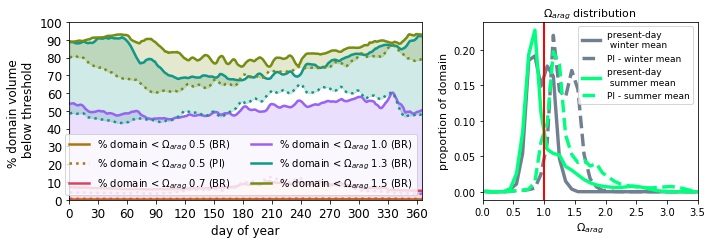

In [10]:
fact = 1
fs = 12
fig = plt.figure(figsize=(10*fact, 3.5*fact))
ax5 = plt.subplot2grid((1,5), (0,0), colspan=3, rowspan=1)

ax5.plot(days,BR_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = '% domain < $\Omega_{arag}$ 0.5 (BR)')
ax5.plot(days,PI_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = ':', label = '% domain < $\Omega_{arag}$ 0.5 (PI)')
ax5.fill_between(days, BR_under_0pt5_vol*100, PI_under_0pt5_vol*100, \
                 color = tcm(1.*0/11), alpha = 0.2 )
ax5.plot(days,BR_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = '% domain < $\Omega_{arag}$ 0.7 (BR)')
ax5.plot(days,PI_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_0pt7_vol*100, PI_under_0pt7_vol*100, \
                 color = tcm(1.*2/11), alpha = 0.2 )
ax5.plot(days,BR_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = '-', label = '% domain < $\Omega_{arag}$ 1.0 (BR)')
ax5.plot(days,PI_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_1pt0_vol*100, PI_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )
ax5.plot(days,BR_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = '% domain < $\Omega_{arag}$ 1.3 (BR)')
ax5.plot(days,PI_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_1pt3_vol*100, PI_under_1pt3_vol*100, \
                 color = tcm(1.*8/11), alpha = 0.2 )

ax5.plot(days,BR_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = '% domain < $\Omega_{arag}$ 1.5 (BR)')
ax5.plot(days,PI_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_1pt5_vol*100, PI_under_1pt5_vol*100, \
                 color = tcm(1.*10/11), alpha = 0.2 )

ax5.tick_params(axis='both', which='major', labelsize=fs)
ax5.legend(loc = 'lower right', fontsize = fs-2, ncol = 2)
w = ax5.set_xticks(np.arange(0, 365, step=30))
ax5.set_xlim(0,365)
ax5.set_ylim(0,100)
w = ax5.set_yticks(np.arange(0, 110, step=10))
ax5.set_ylabel('% domain volume \n below threshold', fontsize = fs)
ax5.set_xlabel('day of year', fontsize = fs)

ax6 = plt.subplot2grid((1,5), (0,3), colspan=2, rowspan=1)

lw = 2.5
ax6.plot(bin_cent[0:nbins],hist_BR3_winter/tot_count, color = 'slategray', lw = 3.4,label = 'present-day \n winter mean')
ax6.plot(bin_cent[0:nbins],hist_PI5_winter/tot_count, \
         color = 'slategray', lw = 3.4, linestyle = '--', label = 'PI - winter mean')
ax6.plot(bin_cent[0:nbins],hist_BR3_summer/tot_count, color = 'springgreen', lw = 3.4,label = 'present-day \n summer mean')
ax6.plot(bin_cent[0:nbins],hist_PI5_summer/tot_count, \
         color = 'springgreen', lw = 3.4, linestyle = '--', label = 'PI - summer mean')
ax6.legend(loc = 'best', fontsize = 9)
ax6.set_xlim([0,3.5])
ax6.set_title('$\Omega_{arag}$ distribution', fontsize = 11)
ax6.axvline(x = 1, color = 'red', lw = 2)
ax6.set_xlabel('$\Omega_{arag}$',  fontsize = 11)
ax6.set_ylabel('proportion of domain', fontsize = 11)
plt.tight_layout()

Text(0.5, 1.0, 'Percentage of model domain below selected $\\Omega_A$ thresholds')

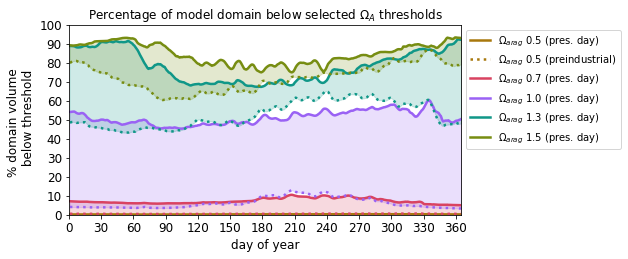

In [11]:
fact = 1
fs = 12
fig = plt.figure(figsize=(12*fact, 3.5*fact))
ax5 = plt.subplot2grid((1,5), (0,0), colspan=3, rowspan=1)

ax5.plot(days,BR_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.5 (pres. day)')
ax5.plot(days,PI_under_0pt5_vol*100,\
        color = tcm(1.*0/11),linewidth = lw, linestyle = ':', label = '$\Omega_{arag}$ 0.5 (preindustrial)')
ax5.fill_between(days, BR_under_0pt5_vol*100, PI_under_0pt5_vol*100, \
                 color = tcm(1.*0/11), alpha = 0.2 )
ax5.plot(days,BR_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 0.7 (pres. day)')
ax5.plot(days,PI_under_0pt7_vol*100,\
        color = tcm(1.*2/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_0pt7_vol*100, PI_under_0pt7_vol*100, \
                 color = tcm(1.*2/11), alpha = 0.2 )
ax5.plot(days,BR_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.0 (pres. day)')
ax5.plot(days,PI_under_1pt0_vol*100,\
        color = tcm(1.*5/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_1pt0_vol*100, PI_under_1pt0_vol*100, \
                 color = tcm(1.*5/11), alpha = 0.2 )
ax5.plot(days,BR_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.3 (pres. day)')
ax5.plot(days,PI_under_1pt3_vol*100,\
        color = tcm(1.*8/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_1pt3_vol*100, PI_under_1pt3_vol*100, \
                 color = tcm(1.*8/11), alpha = 0.2 )

ax5.plot(days,BR_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = '$\Omega_{arag}$ 1.5 (pres. day)')
ax5.plot(days,PI_under_1pt5_vol*100,\
        color = tcm(1.*10/11),linewidth = lw, linestyle = ':')
ax5.fill_between(days, BR_under_1pt5_vol*100, PI_under_1pt5_vol*100, \
                 color = tcm(1.*10/11), alpha = 0.2 )

ax5.tick_params(axis='both', which='major', labelsize=fs)
ax5.legend(bbox_to_anchor=[1,1], fontsize = fs-2, ncol = 1)
w = ax5.set_xticks(np.arange(0, 365, step=30))
ax5.set_xlim(0,365)
ax5.set_ylim(0,100)
w = ax5.set_yticks(np.arange(0, 110, step=10))
ax5.set_ylabel('% domain volume \n below threshold', fontsize = fs)
ax5.set_xlabel('day of year', fontsize = fs)
ax5.set_title('Percentage of model domain below selected $\Omega_A$ thresholds')

# ax6 = plt.subplot2grid((1,5), (0,3), colspan=2, rowspan=1)

# lw = 2.5
# ax6.plot(bin_cent[0:nbins],hist_BR3_winter/tot_count, color = 'slategray', lw = 3.4,label = 'BR - winter mean')
# ax6.plot(bin_cent[0:nbins],hist_PI5_winter/tot_count, \
#          color = 'slategray', lw = 3.4, linestyle = '--', label = 'PI - winter mean')
# ax6.plot(bin_cent[0:nbins],hist_BR3_summer/tot_count, color = 'springgreen', lw = 3.4,label = 'BR - summer mean')
# ax6.plot(bin_cent[0:nbins],hist_PI5_summer/tot_count, \
#          color = 'springgreen', lw = 3.4, linestyle = '--', label = 'PI - summer mean')
# ax6.legend(loc = 'best')
# ax6.set_xlim([0,3.5])
# ax6.set_title('$\Omega_A$ distribution')
# ax6.axvline(x = 1, color = 'red', lw = 2)
# ax6.set_xlabel('$\Omega_A$')
# ax6.set_ylabel('proportion of domain')
# plt.tight_layout()

In [27]:
print(np.mean(BR_under_1pt0_vol))

0.5102130320522045


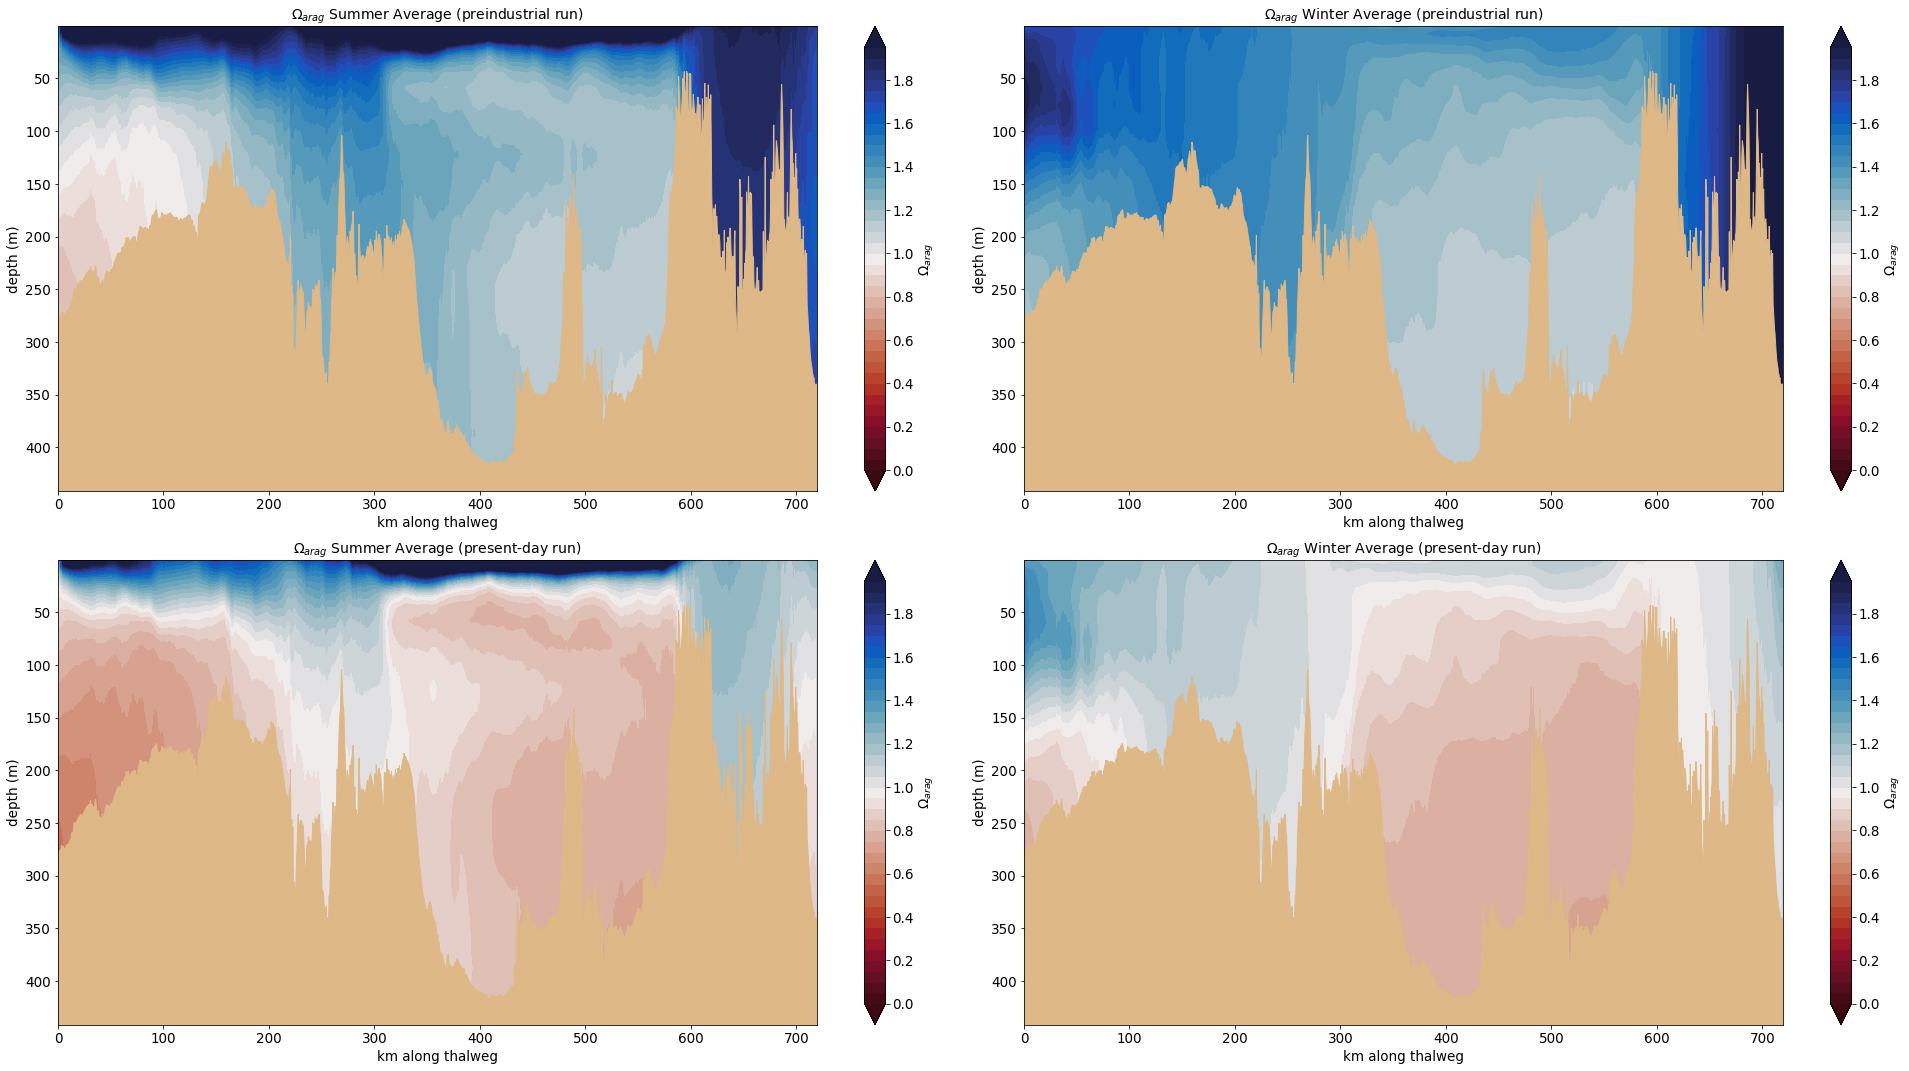

In [12]:
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

# vis.contour_thalweg(ax3, BR3_DIC_summer, bathy, meshmask,\
#                     np.arange(dicmin_twg, dicmax_twg, dicstep), cmap = cm.matter)

ts = 14 # title font
fs = 13.5 # all other font sizes
fact = 2.3
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot2grid((6,6), (0,0), colspan=3, rowspan=2)
PI5_summer_3mon[PI5_summer_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax1, PI5_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax1.set_title('$\Omega_{arag}$ Summer Average (preindustrial run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_xlabel('km along thalweg', fontsize = fs)
ax1.set_ylabel('depth (m)', fontsize = fs)


ax2 = plt.subplot2grid((6,6), (0,3), colspan=3, rowspan=2)
PI5_winter_3mon[PI5_winter_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax2, PI5_winter_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax2.set_title('$\Omega_{arag}$ Winter Average (preindustrial run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.set_xlabel('km along thalweg', fontsize = fs)
ax2.set_ylabel('depth (m)', fontsize = fs)

ax3 = plt.subplot2grid((6,6), (2,0), colspan=3, rowspan=2)
BR3_summer_3mon[BR3_summer_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax3, BR3_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax3.set_title('$\Omega_{arag}$ Summer Average (present-day run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.set_xlabel('km along thalweg', fontsize = fs)
ax3.set_ylabel('depth (m)', fontsize = fs)

ax4 = plt.subplot2grid((6,6), (2,3), colspan=3, rowspan=2)
BR3_winter_3mon[BR3_winter_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax4, BR3_winter_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax4.set_title('$\Omega_{arag}$ Winter Average (present-day run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_{arag}$', fontsize = fs)
ax4.tick_params(axis='both', which='major', labelsize=fs)
ax4.set_xlabel('km along thalweg', fontsize = fs)
ax4.set_ylabel('depth (m)', fontsize = fs)

plt.tight_layout()
plt.savefig('Fig4_a_d.png')

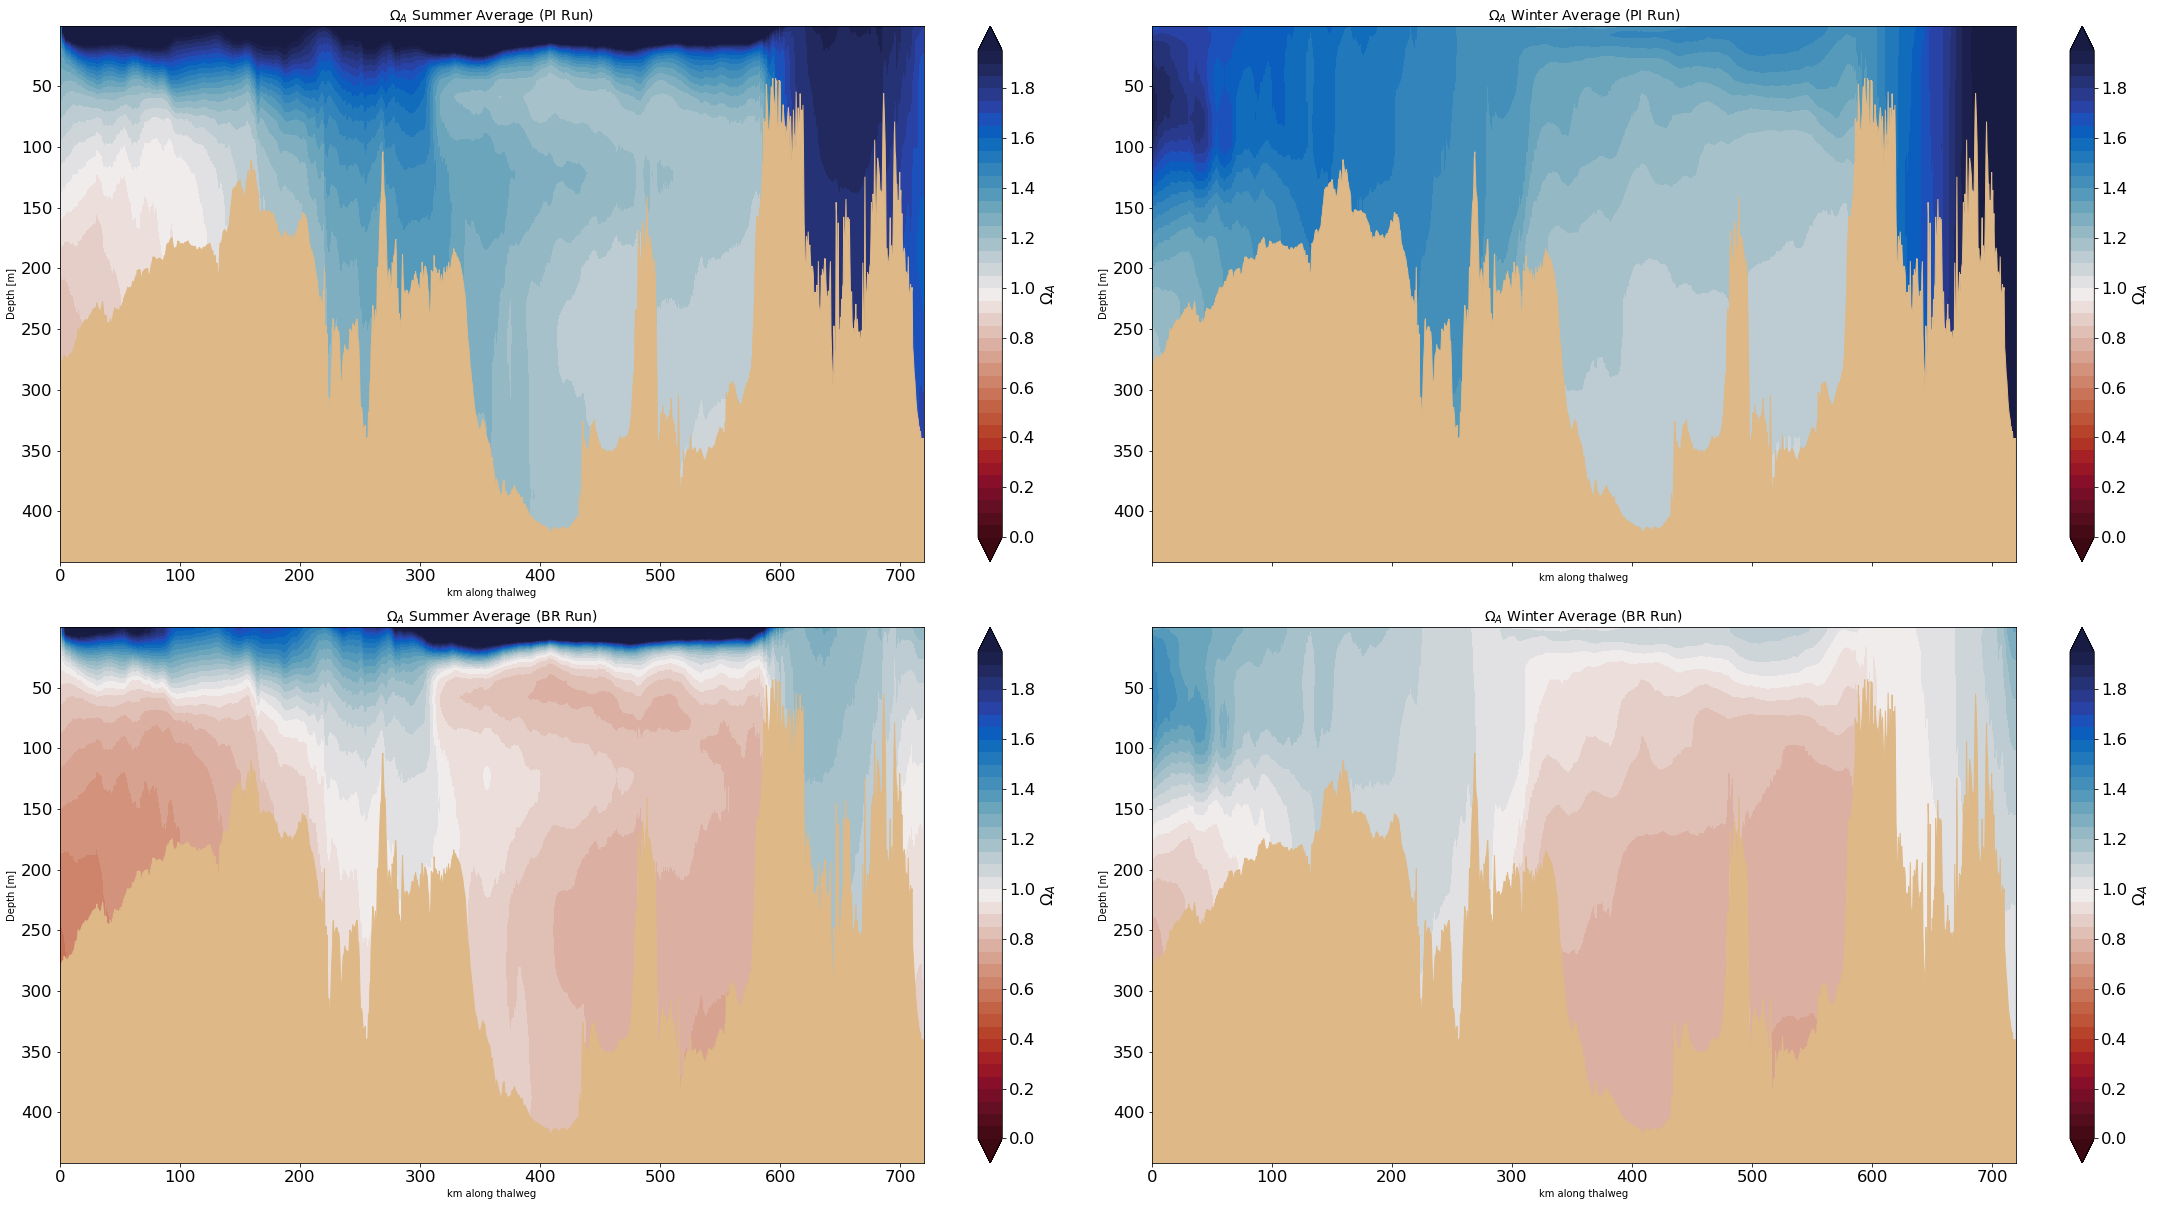

In [13]:
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

# vis.contour_thalweg(ax3, BR3_DIC_summer, bathy, meshmask,\
#                     np.arange(dicmin_twg, dicmax_twg, dicstep), cmap = cm.matter)

ts = 14 # title font
fs = 16.5 # all other font sizes
fact = 2.6
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot2grid((6,6), (0,0), colspan=3, rowspan=2)
PI5_summer_3mon[PI5_summer_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax1, PI5_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax1.set_title('$\Omega_A$ Summer Average (PI Run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_xlabel('km along thalweg')

ax2 = plt.subplot2grid((6,6), (0,3), colspan=3, rowspan=2)
PI5_winter_3mon[PI5_winter_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax2, PI5_winter_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax2.set_title('$\Omega_A$ Winter Average (PI Run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.set_xticklabels([])
ax2.set_xlabel('')
ax2.set_xlabel('km along thalweg')

ax3 = plt.subplot2grid((6,6), (2,0), colspan=3, rowspan=2)
BR3_summer_3mon[BR3_summer_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax3, BR3_summer_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax3.set_title('$\Omega_A$ Summer Average (BR Run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.set_xlabel('km along thalweg')

ax4 = plt.subplot2grid((6,6), (2,3), colspan=3, rowspan=2)
BR3_winter_3mon[BR3_winter_3mon > 1e10] = 1.1
cbar = \
vis.contour_thalweg(ax4, BR3_winter_3mon, bathy, mesh,\
                    np.arange(0.0, 2.0, 0.05), cmap = cmocean.cm.balance_r)
ax4.set_title('$\Omega_A$ Winter Average (BR Run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('$\Omega_A$', fontsize = fs)
ax4.tick_params(axis='both', which='major', labelsize=fs)
ax4.set_xlabel('km along thalweg')

plt.tight_layout()
plt.savefig('Fig4cbar.png')

## legacy code

In [14]:
BR3_winter_nn = BR3_winter_3mon[BR3_winter_3mon<1e10]
BR3_summer_nn = BR3_summer_3mon[BR3_summer_3mon<1e10]
PI4_winter_nn = PI4_winter_3mon[PI4_winter_3mon<1e10]
PI4_summer_nn = PI4_summer_3mon[PI4_summer_3mon<1e10]

PI4_summer_0s = PI4_summer_nn[PI4_summer_nn == 0]
PI4_winter_0s = PI4_winter_nn[PI4_winter_nn == 0]
BR3_summer_0s = BR3_summer_nn[BR3_summer_nn == 0]
BR3_winter_0s = BR3_winter_nn[BR3_winter_nn == 0]
print(np.max(BR3_summer_nn))
print(np.shape(PI4_summer_0s))
print(np.shape(BR3_summer_0s))
print(1061/(40*898*398)*100)

NameError: name 'PI4_winter_3mon' is not defined

In [ ]:



step = 0.1
t_start = 0
t_end = 4
bin_starts = np.arange(t_start,t_end,step)
bin_ends = np.arange(t_start+step,t_end+step,step)
bin_centres = np.arange(t_start+step/2,t_end + step/2 ,step)
bin_prop = np.zeros_like(bin_centres)

def manual_hist(test_hist):
    for i in range(0,len(bin_starts)):
        obs_in_bin = test_hist[((test_hist>=bin_starts[i]) &\
                               (test_hist<bin_ends[i]))]

        bin_prop[i] = np.size(obs_in_bin)/np.size(test_hist)
    return bin_prop

# bin_propLA = manual_hist(LA_nonan)
# t_LA = np.copy(bin_propLA)
bin_propBR3_winter = manual_hist(BR3_winter_nn)
t_BR3_winter = np.copy(bin_propBR3_winter)
bin_propPI4_winter = manual_hist(PI4_winter_nn)
t_PI4_winter = np.copy(bin_propPI4_winter)
bin_propBR3_summer = manual_hist(BR3_summer_nn)
t_BR3_summer = np.copy(bin_propBR3_summer)
bin_propPI4_summer = manual_hist(PI4_summer_nn)
t_PI4_summer = np.copy(bin_propPI4_summer)


In [ ]:
csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb'))
print(np.shape(csize))

BR3_summer_3mon = pickle.load(open('../pkls/aragonite/BR3_Oma_SUMMERmean_01jun_31aug.pkl', 'rb'))  
BR3_winter_3mon = pickle.load(open('../pkls/aragonite/BR3_Oma_WINTERmean_01dec_28feb.pkl', 'rb'))  
PI4_summer_3mon = pickle.load(open('../pkls/aragonite/PI4_Oma_SUMMERmean_01jun_31aug.pkl', 'rb'))  
PI4_winter_3mon = pickle.load(open('../pkls/aragonite/PI4_Oma_WINTERmean_01dec_28feb.pkl', 'rb'))  

csize[BR3_summer_3mon > 1e10 ] = 0


BR3_summer_nn = BR3_summer_3mon[BR3_summer_3mon<1e10]
BR3_winter_nn = BR3_winter_3mon[BR3_winter_3mon<1e10]
PI4_summer_nn = PI4_summer_3mon[PI4_summer_3mon<1e10]
PI4_winter_nn = PI4_winter_3mon[PI4_winter_3mon<1e10]



csize_nn = csize[BR3_summer_3mon<1e10]
csize_nn[np.isnan(csize_nn)] = 0


nbins = 35
hist_BR3_summer, bins = np.histogram(BR3_summer_nn, bins=nbins, range = [0, 4], weights=csize_nn)
hist_PI4_summer, bins = np.histogram(PI4_summer_nn, bins=nbins, range = [0, 4], weights=csize_nn)
hist_BR3_winter, bins = np.histogram(BR3_winter_nn, bins=nbins, range = [0, 4], weights=csize_nn)
hist_PI4_winter, bins = np.histogram(PI4_winter_nn, bins=nbins, range = [0, 4], weights=csize_nn)

bin_cent = bins + (bins[1]-bins[0])/2
tot_count = np.sum(hist_BR3_summer)
fig = plt.figure(figsize=(16*fact,5*fact))
lw = 2.5
ax1 = fig.add_subplot(1,1,1)

#ax1.plot(bin_centres,t_LA, color = 'dimgrey', lw = 3.4, label = 'LA yearly gas flux')
ax1.plot(bin_cent[0:nbins],hist_BR3_winter/tot_count, color = 'slategray', lw = 3.4,label = 'BR - winter domain mean')
ax1.plot(bin_cent[0:nbins],hist_PI4_winter/tot_count, \
         color = 'slategray', lw = 3.4, linestyle = '--', label = 'PI - winter domain mean')
ax1.plot(bin_cent[0:nbins],hist_BR3_summer/tot_count, color = 'springgreen', lw = 3.4,label = 'BR - summer domain mean')
ax1.plot(bin_cent[0:nbins],hist_PI4_summer/tot_count, \
         color = 'springgreen', lw = 3.4, linestyle = '--', label = 'PI - summer domain mean')
ax1.legend(loc = 'best')
ax1.set_xlim([0,3.5])
#ax1.set_ylim([0,.25])

In [ ]:
# test_ar = [0.5, np.nan, 1.2]
# cell_size = [1, 1, 5]

# hist, bins = np.histogram(test_ar, bins=2, range=[0, 2], weights=cell_size)

# print(bins)
# print(hist)

In [ ]:
# fig = plt.figure(figsize=(16*fact,5*fact))
# lw = 2.5
# ax1 = fig.add_subplot(1,1,1)
# #ax1.plot(bin_centres,t_LA, color = 'dimgrey', lw = 3.4, label = 'LA yearly gas flux')
# ax1.plot(bin_centres,t_BR3_winter, color = 'slategray', lw = 3.4,label = 'BR - winter domain mean')
# ax1.plot(bin_centres,t_PI4_winter, \
#          color = 'slategray', lw = 3.4, linestyle = '--', label = 'PI - winter domain mean')
# ax1.plot(bin_centres,t_BR3_summer, color = 'springgreen', lw = 3.4,label = 'BR - summer domain mean')
# ax1.plot(bin_centres,t_PI4_summer, \
#          color = 'springgreen', lw = 3.4, linestyle = '--', label = 'PI - summer domain mean')

In [ ]:
# days = np.arange(1,366,1)
# tcm = cmocean.cm.phase

# fs = 18
# fact = 0.7
# fig = plt.figure(figsize=(14*fact,8*fact))
# lw = 2.5
# ax1 = fig.add_subplot(1,1,1)


# ax1.plot(days,BR_under_0pt5_vol*100,\
#         color = tcm(1.*0/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.5')
# ax1.plot(days,PI_under_0pt5_vol*100,\
#         color = tcm(1.*0/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.5')
# ax1.fill_between(days, BR_under_0pt5_vol*100, PI_under_0pt5_vol*100, \
#                  color = tcm(1.*0/11), alpha = 0.2 )

# ax1.plot(days,BR_under_0pt7_vol*100,\
#         color = tcm(1.*2/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.7')
# ax1.plot(days,PI_under_0pt7_vol*100,\
#         color = tcm(1.*2/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.7')
# ax1.fill_between(days, BR_under_0pt7_vol*100, PI_under_0pt7_vol*100, \
#                  color = tcm(1.*2/11), alpha = 0.2 )

# # ax1.plot(days,BR_under_0pt9_vol*100,\
# #         color = tcm(1.*4/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 0.9')
# # ax1.plot(days,PI_under_0pt9_vol*100,\
# #          color = tcm(1.*4/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 0.9')
# # ax1.fill_between(days, BR_under_0pt9_vol*100, PI_under_0pt9_vol*100, \
# #                  color = tcm(1.*4/11), alpha = 0.2 )

# ax1.plot(days,BR_under_1pt0_vol*100,\
#         color = tcm(1.*5/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.0')
# ax1.plot(days,PI_under_1pt0_vol*100,\
#         color = tcm(1.*5/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.0')
# ax1.fill_between(days, BR_under_1pt0_vol*100, PI_under_1pt0_vol*100, \
#                  color = tcm(1.*5/11), alpha = 0.2 )

# # ax1.plot(days,BR_under_1pt1_vol*100,\
# #         color = tcm(1.*6/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.1')
# # ax1.plot(days,PI_under_1pt1_vol*100,\
# #         color = tcm(1.*6/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.1')
# # ax1.fill_between(days, BR_under_1pt1_vol*100, PI_under_1pt1_vol*100, \
# #                  color = tcm(1.*6/11), alpha = 0.2 )

# ax1.plot(days,BR_under_1pt3_vol*100,\
#         color = tcm(1.*8/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.3')
# ax1.plot(days,PI_under_1pt3_vol*100,\
#         color = tcm(1.*8/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.3')
# ax1.fill_between(days, BR_under_1pt3_vol*100, PI_under_1pt3_vol*100, \
#                  color = tcm(1.*8/11), alpha = 0.2 )

# ax1.plot(days,BR_under_1pt5_vol*100,\
#         color = tcm(1.*10/11),linewidth = lw, linestyle = '-', label = 'BR - cells under 1.5')
# ax1.plot(days,PI_under_1pt5_vol*100,\
#         color = tcm(1.*10/11),linewidth = lw, linestyle = ':', label = 'PI - cells under 1.5')
# ax1.fill_between(days, BR_under_1pt5_vol*100, PI_under_1pt5_vol*100, \
#                  color = tcm(1.*10/11), alpha = 0.2 )

# ax1.tick_params(axis='both', which='major', labelsize=15)
# ax1.legend(bbox_to_anchor=[1.4, 1.2], fontsize = fs-4.5)

# w = ax1.set_xticks(np.arange(0, 365, step=30))
# ax1.set_xlim(0,365)
# w = ax1.set_yticks(np.arange(0, 110, step=10))
# ax1.set_ylabel('% domain volume below threshold', fontsize = 18)
# ax1.set_title('Shift in % domain volume below a given threshold', fontsize = 18)
# ax1.set_xlabel('days', fontsize = 18)